# Introdução

## Importação das bibliotecas necessarias

In [1]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [2]:
csvs = glob.glob(os.path.join('../csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [3]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [4]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2015


In [5]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=42, options=('Q-121-proporcao_nascidos_vivos_com_numero_de_consulta…

In [65]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)

../csv_files/QW-21-razao_mortalidade_materna_direta.csv


In [66]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('../csv_files/Estados.csv')
df_municipios = pd.read_csv('../csv_files/Municipios.csv')
df_pop_fem_10_49 = pd.read_csv('../tabelas_tabnet/mulheres_10_49_por_municipio_limpa.csv', ';')


In [67]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES Ano Qtd_Morte_Materna_Direta Qtd_Total Ratio


## Solução do problema de 2019 vazio

In [68]:

years = []
for col in df_pop_fem_10_49:
    if col != 'Municipio':
        years.append(col)

all_entries = []
for index, row in df_pop_fem_10_49.iterrows():
    row_array = row.values.tolist()
    for i in range(len(row_array)):
        if i != 0:
            pop = row_array[i]
            if pop == '-':
                pop = row_array[i+1]
            all_entries.append([row_array[0], years[i-1], int(pop)])

            
df_pop_fem_10_49_by_codmunres = pd.DataFrame(all_entries, columns=[coluna_codigo, ano, 'Pop'])
del df_pop_fem_10_49_by_codmunres['Pop']

# do a right join
df_pop_fem_10_49_by_codmunres[coluna_codigo] = df_pop_fem_10_49_by_codmunres[coluna_codigo].astype(str)
df_pop_fem_10_49_by_codmunres[ano] = df_pop_fem_10_49_by_codmunres[ano].astype(str)
df[coluna_codigo] = df[coluna_codigo].astype(str)
df[ano] = df[ano].astype(str)
df_merge = pd.merge(df, df_pop_fem_10_49_by_codmunres, on=[coluna_codigo,ano], how='right')
df_merge = df_merge.fillna(0)
df = df_merge
df[ano] = df[ano].astype(int)
df[coluna_codigo] = df[coluna_codigo].astype(int)

df


,CODMUNRES,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
0,110001,2012,0.0,386.0,0.000000
1,110001,2013,0.0,382.0,0.000000
2,110001,2014,0.0,341.0,0.000000
3,110001,2015,0.0,373.0,0.000000
4,110001,2016,0.0,326.0,0.000000
...,...,...,...,...,...
44555,530010,2015,10.0,46122.0,21.681627
44556,530010,2016,17.0,43340.0,39.224735
44557,530010,2017,14.0,44568.0,31.412673
44558,530010,2018,19.0,44195.0,42.991289


In [69]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [11]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [12]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5570 Municípios registrados no país


In [70]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  2116
Ano:  2013  Municipios com menos de 100 registros no total:  2162
Ano:  2014  Municipios com menos de 100 registros no total:  2106
Ano:  2015  Municipios com menos de 100 registros no total:  2119
Ano:  2016  Municipios com menos de 100 registros no total:  2194
Ano:  2017  Municipios com menos de 100 registros no total:  2138
Ano:  2018  Municipios com menos de 100 registros no total:  2120
Ano:  2019  Municipios com menos de 100 registros no total:  2160


In [71]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [72]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [73]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
25936,330455,2012,36.0,86549.0,41.594935
25937,330455,2013,35.0,87661.0,39.926535
25938,330455,2014,32.0,89991.0,35.559111
25939,330455,2015,45.0,90694.0,49.617395
25940,330455,2016,32.0,83166.0,38.477262
25941,330455,2017,40.0,84521.0,47.325517
25942,330455,2018,26.0,82554.0,31.494537
25943,330455,2019,34.0,76803.0,44.269104


In [74]:
nome_indicador = nome_arquivo_indicador.split('-')[2].replace('_',' ').upper()
print(nome_indicador)

RAZAO MORTALIDADE MATERNA DIRETA


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

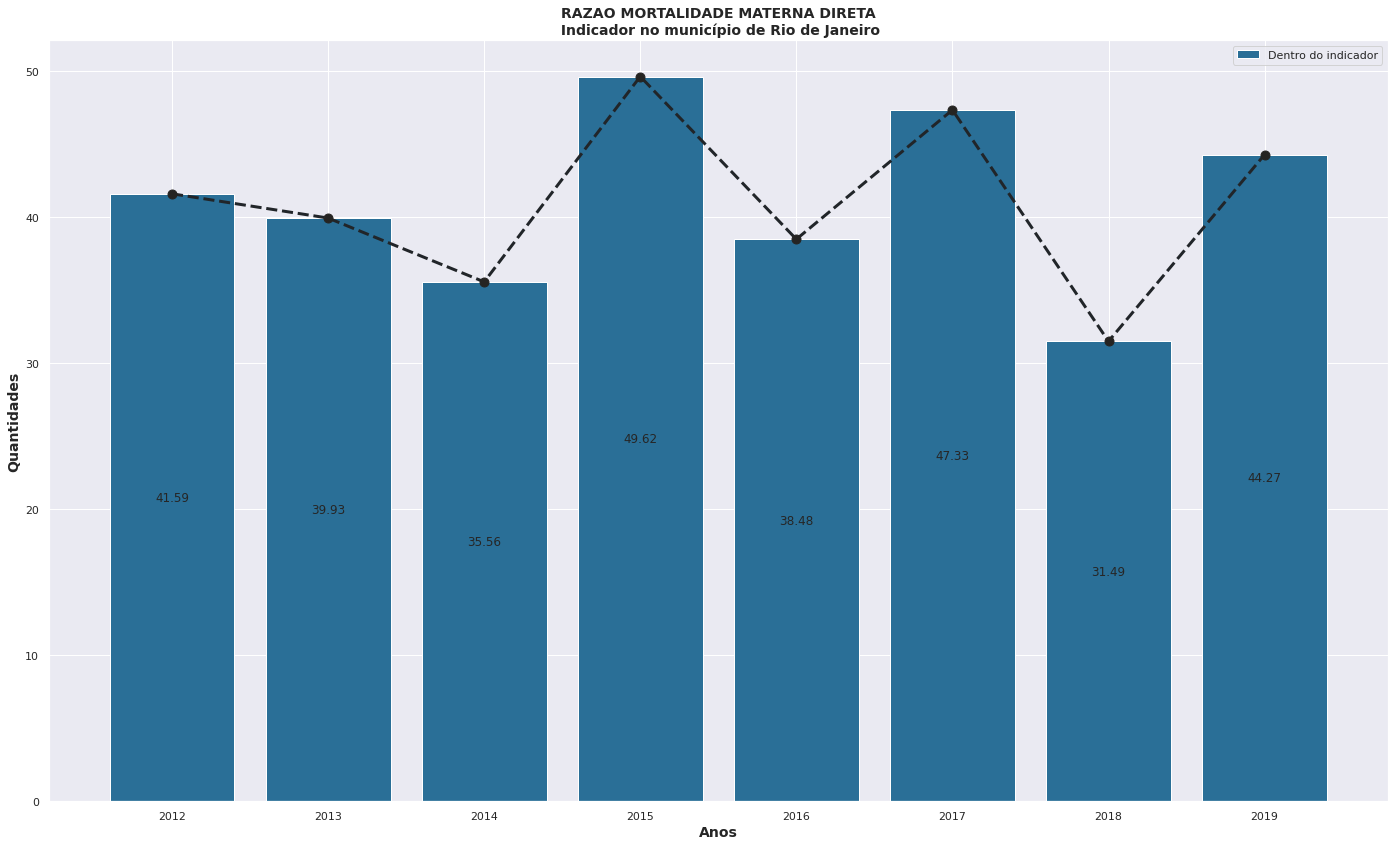

In [75]:
fig, ax = plt.subplots(figsize=(24, 14))

plt.plot(subset_mun[ano],np.round(subset_mun[ratio],decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529')
#p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], np.round(subset_mun[ratio],decimals=2), color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

'''
for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
'''
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [19]:
subset_mun.head()

,CODMUNRES,Ano,Qtd_Morte_Materna,Qtd_Total,Ratio
25936,330455,2012,59.0,86549.0,68.169476
25937,330455,2013,67.0,87661.0,76.430796
25938,330455,2014,64.0,89991.0,71.118223
25939,330455,2015,65.0,90694.0,71.669570
25940,330455,2016,62.0,83166.0,74.549696


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

No handles with labels found to put in legend.


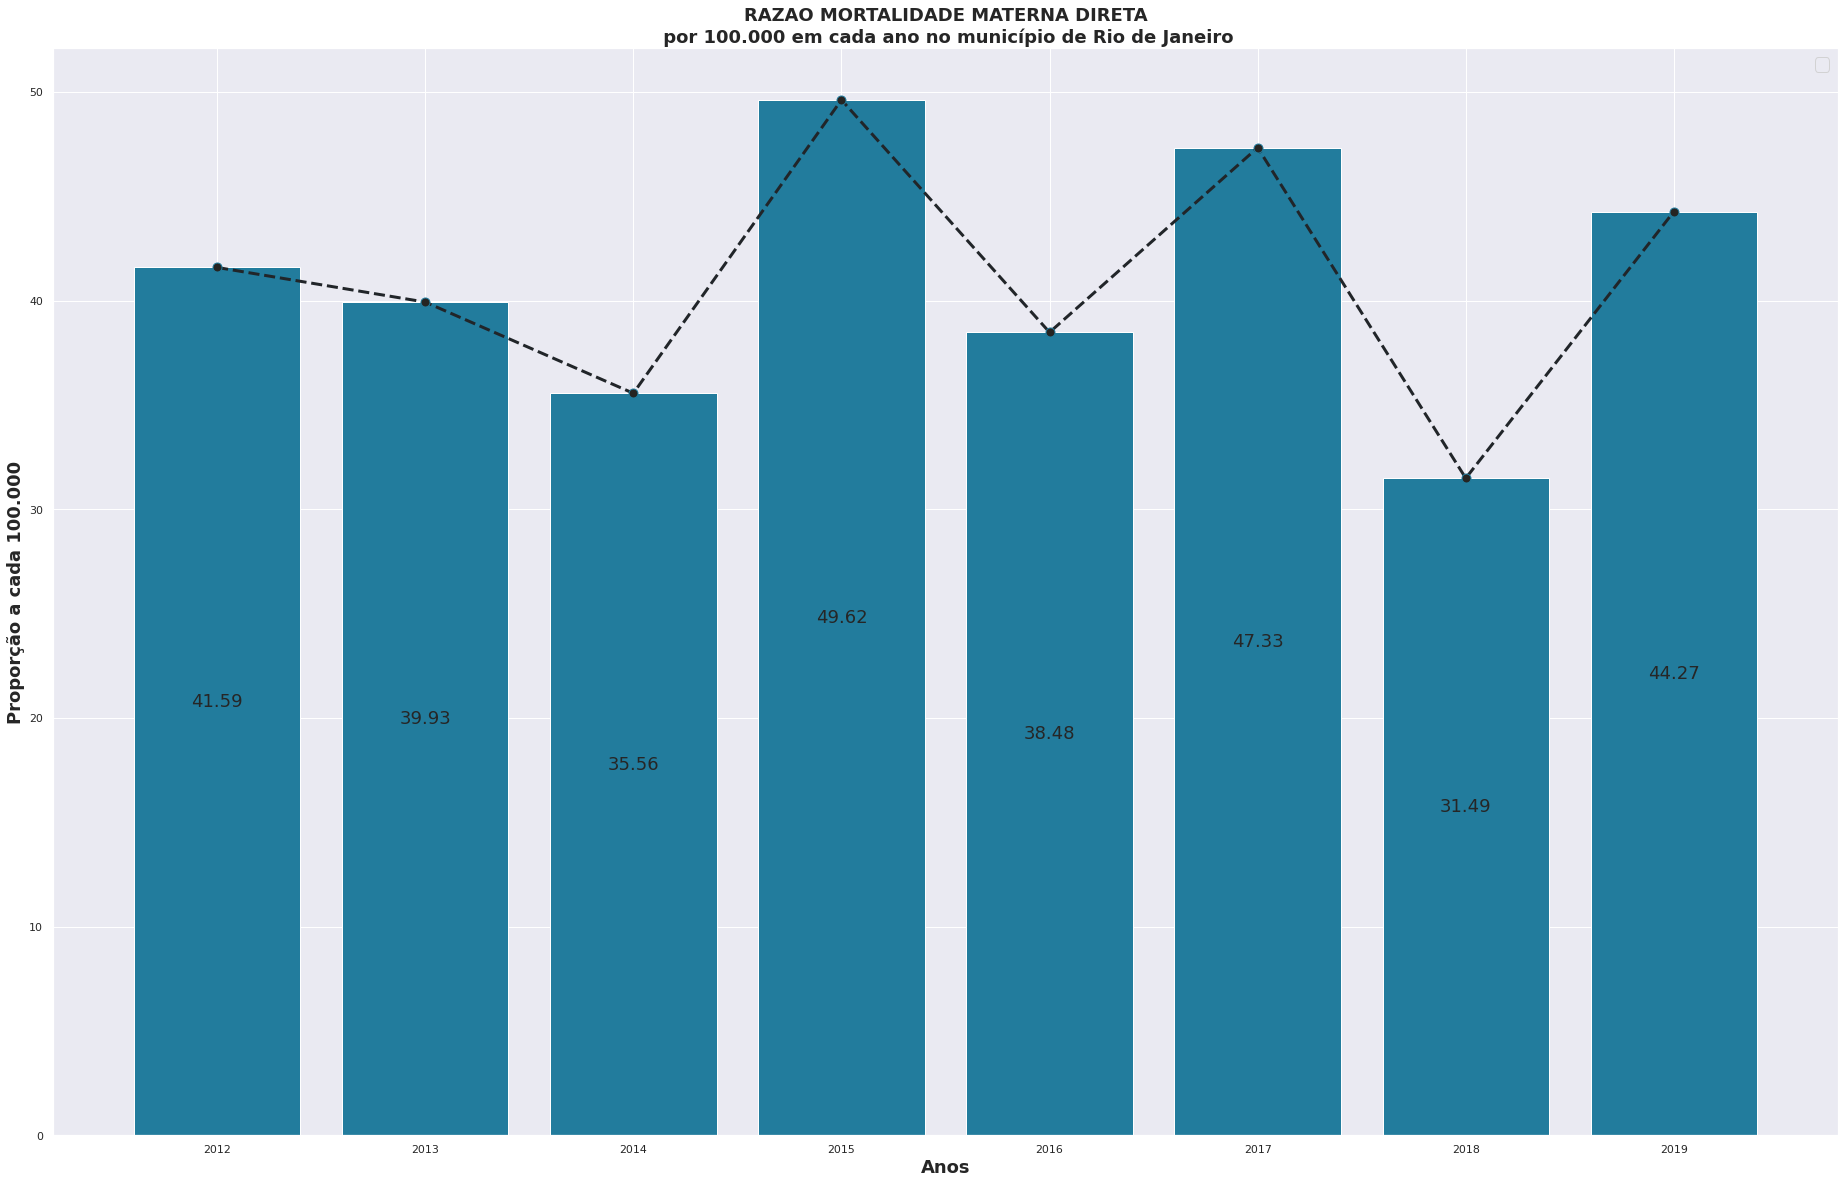

In [76]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano],np.round(subset_mun[ratio],decimals=2),'.--',markersize=18,mec='#227c9d',mfc='#252422',linewidth=3,color='#212529')

#p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
#p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )
p2=ax.bar( subset_mun[ano], np.round(subset_mun[ratio],decimals=2), color ='#227c9d')


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n por 100.000 em cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 100.000',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )

#plt.savefig('../Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [77]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = np.round(100000*(df_grouped_by_state[indicador]/df_grouped_by_state[total]),decimals=2)
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador RAZAO MORTALIDADE MATERNA DIRETA 

     COD_UF   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
144      33  2012                       105     222837  47.12
145      33  2013                        98     224008  43.75
146      33  2014                        89     233569  38.10
147      33  2015                        94     236946  39.67
148      33  2016                        87     219124  39.70
149      33  2017                       110     223216  49.28
150      33  2018                        86     220481  39.01
151      33  2019                        91     207966  43.76


No handles with labels found to put in legend.


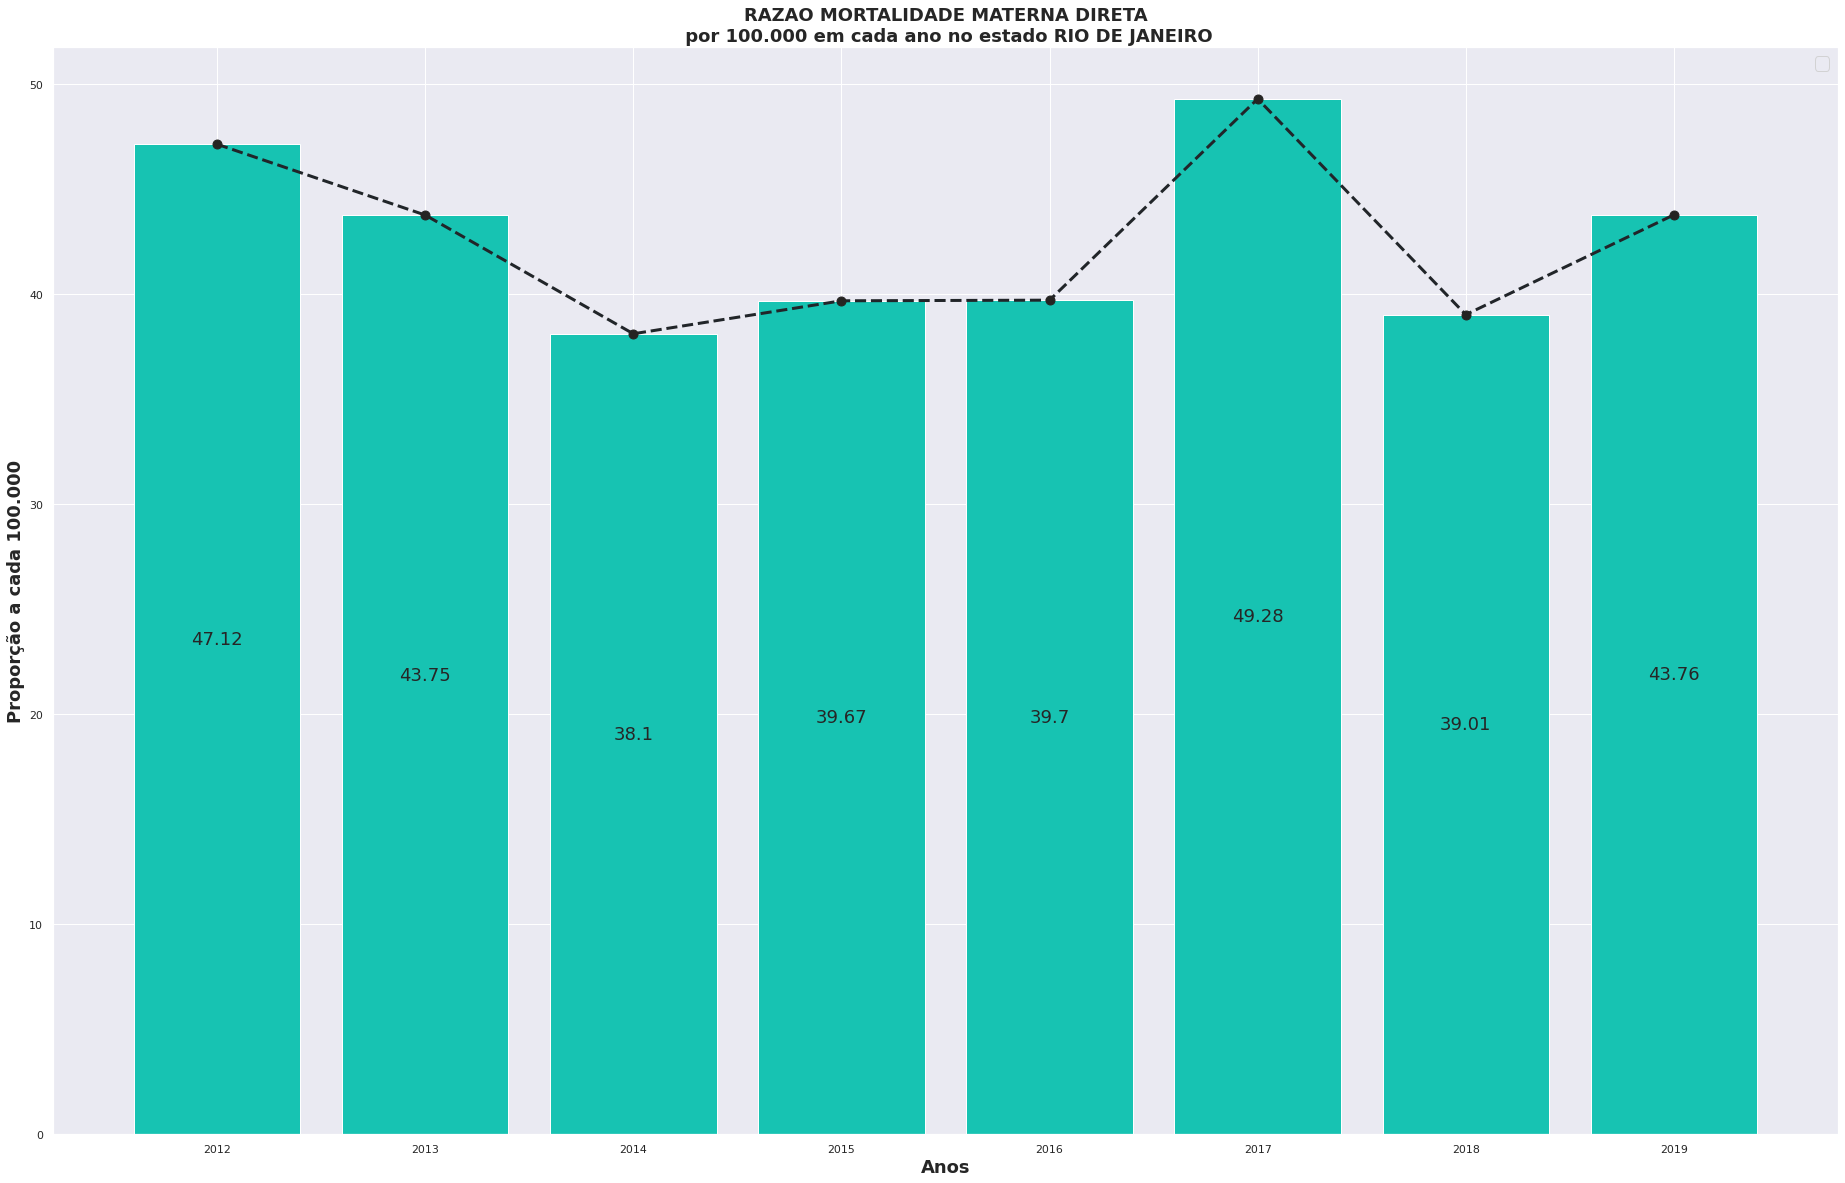

In [78]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio],decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529')

#p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(df_estado_acumulado[ratio], decimals=2), color ='#17c3b2' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n por 100.000 em cada ano no estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 100.000',**font)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )
#plt.savefig('../Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [79]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('../csv_files/37-sudeste.csv',index=False)

      CODMUNRES   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
17952    310010  2012                         0         68    0.0
17953    310010  2013                         0         57    0.0
17954    310010  2014                         0         71    0.0
17955    310010  2015                         0         53    0.0
17956    310010  2016                         0         59    0.0
...         ...   ...                       ...        ...    ...
31291    355715  2015                         0         33    0.0
31292    355715  2016                         0         28    0.0
31293    355715  2017                         0         24    0.0
31294    355715  2018                         0         25    0.0
31295    355715  2019                         0         25    0.0

[13344 rows x 5 columns]


In [80]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, np.round(soma_anos_indicador/soma_anos_total *100000,2)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [81]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
0    Sudeste  2012                       319    1152791  27.67
1    Sudeste  2013                       353    1147576  30.76
2    Sudeste  2014                       368    1182913  31.11
3    Sudeste  2015                       400    1196195  33.44
4    Sudeste  2016                       381    1127473  33.79
5    Sudeste  2017                       429    1151817  37.25
6    Sudeste  2018                       395    1146980  34.44
7    Sudeste  2019                       350    1102964  31.73

   NOMEREGIAO   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
0        Sul  2012                       114     381658  29.87
1        Sul  2013                        83     386978  21.45
2        Sul  2014                        89     396460  22.45
3        Sul  2015                       107     406526  26.32
4        Sul  2016                       110     391789  28.08
5        Sul  2017                        90     3975

## 

In [82]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
0,Norte,2012,138,308353,44.75
1,Norte,2013,171,313216,54.59
2,Norte,2014,180,321641,55.96
3,Norte,2015,153,320890,47.68
4,Norte,2016,166,307495,53.98
5,Norte,2017,186,312660,59.49
6,Norte,2018,171,319199,53.57
7,Norte,2019,170,313678,54.20
0,Nordeste,2012,377,832606,45.28
1,Nordeste,2013,439,821427,53.44


In [83]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
17952    310010  2012                         0         68    0.0
17953    310010  2013                         0         57    0.0
17954    310010  2014                         0         71    0.0
17955    310010  2015                         0         53    0.0
17956    310010  2016                         0         59    0.0
...         ...   ...                       ...        ...    ...
31291    355715  2015                         0         33    0.0
31292    355715  2016                         0         28    0.0
31293    355715  2017                         0         24    0.0
31294    355715  2018                         0         25    0.0
31295    355715  2019                         0         25    0.0

[13344 rows x 5 columns]


In [28]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: Ano, dtype: int64

No handles with labels found to put in legend.


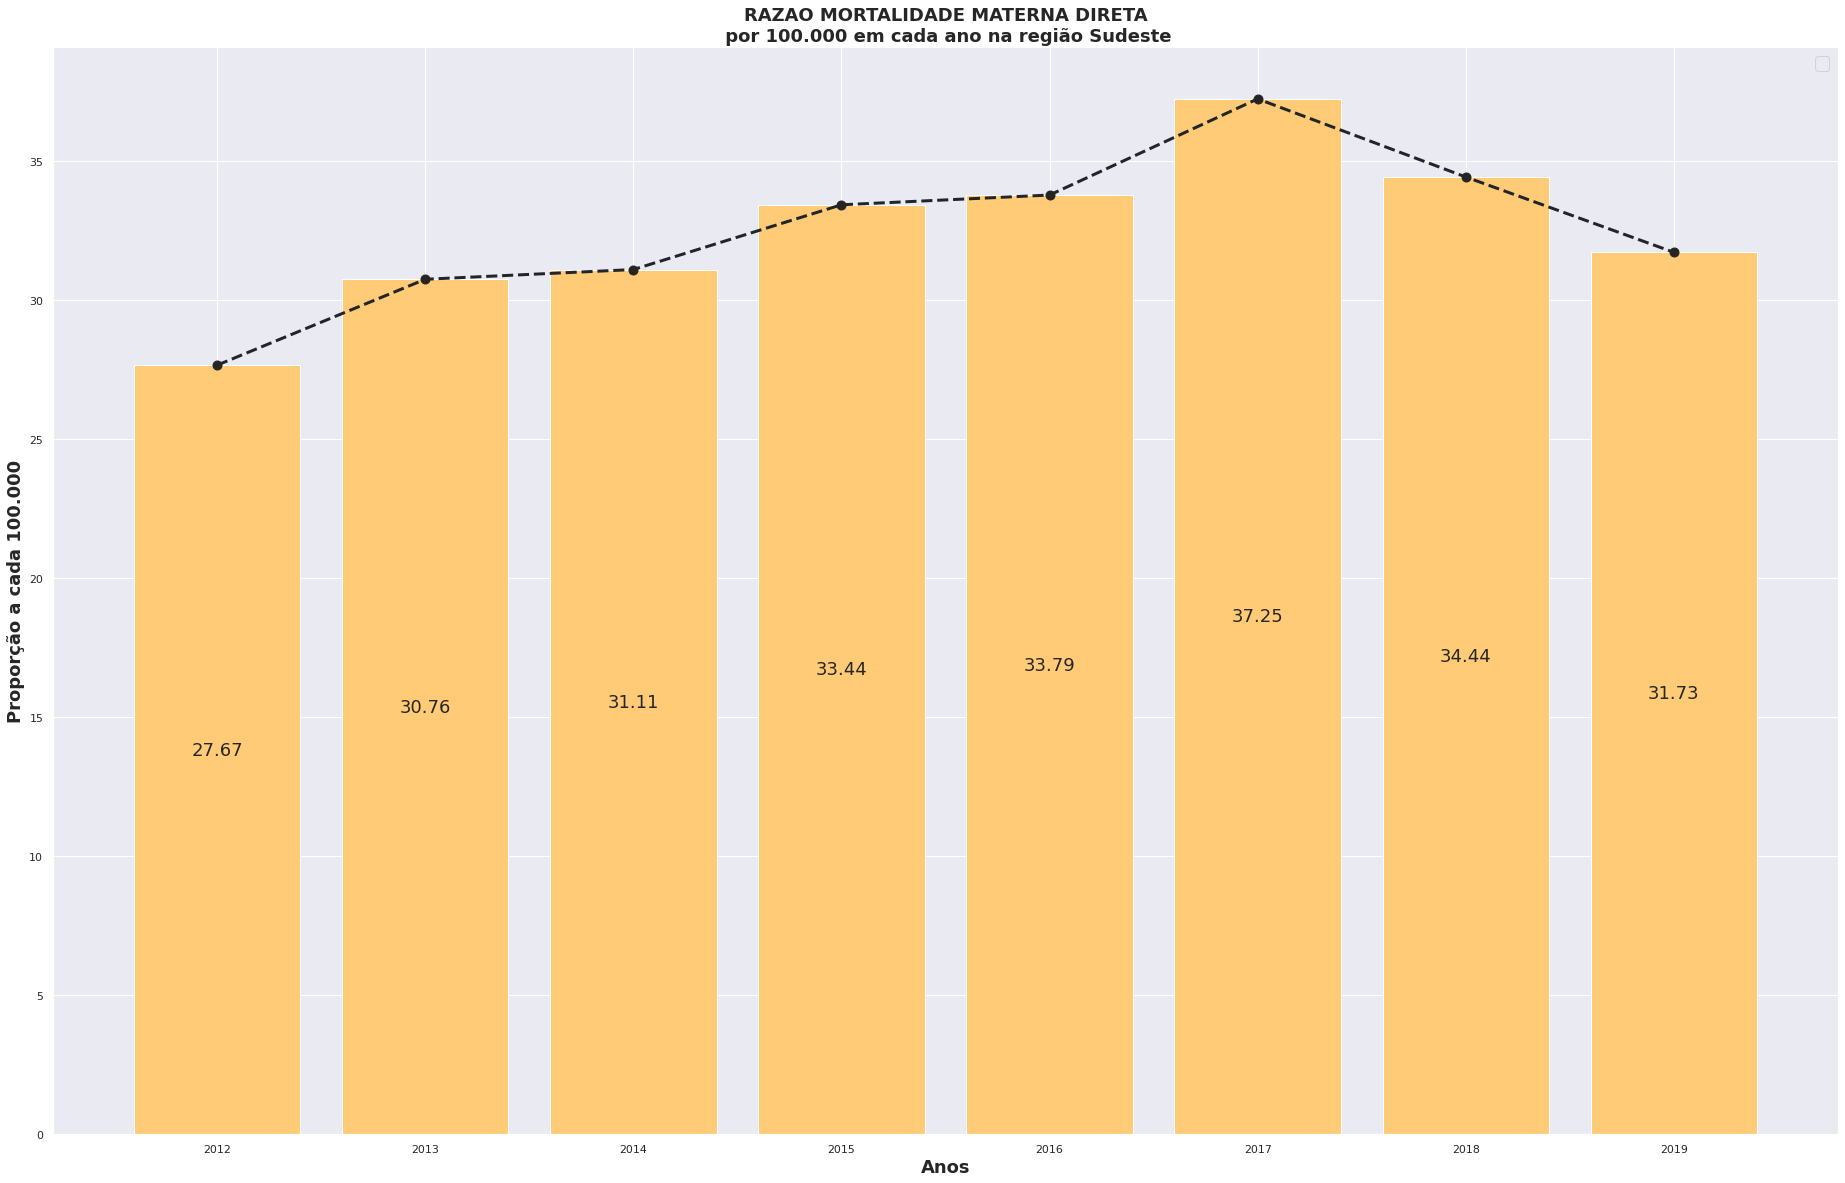

In [84]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

#p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(regiao_acumulada[ratio], decimals=2), color ='#ffcb77')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n por 100.000 em cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 100.000',**font)

#ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center", fontsize = 18)
ax.legend(loc='upper right', fontsize = 18 )

#plt.savefig('../Imagens/10-grafico3', bbox_inches='tight')
plt.show()

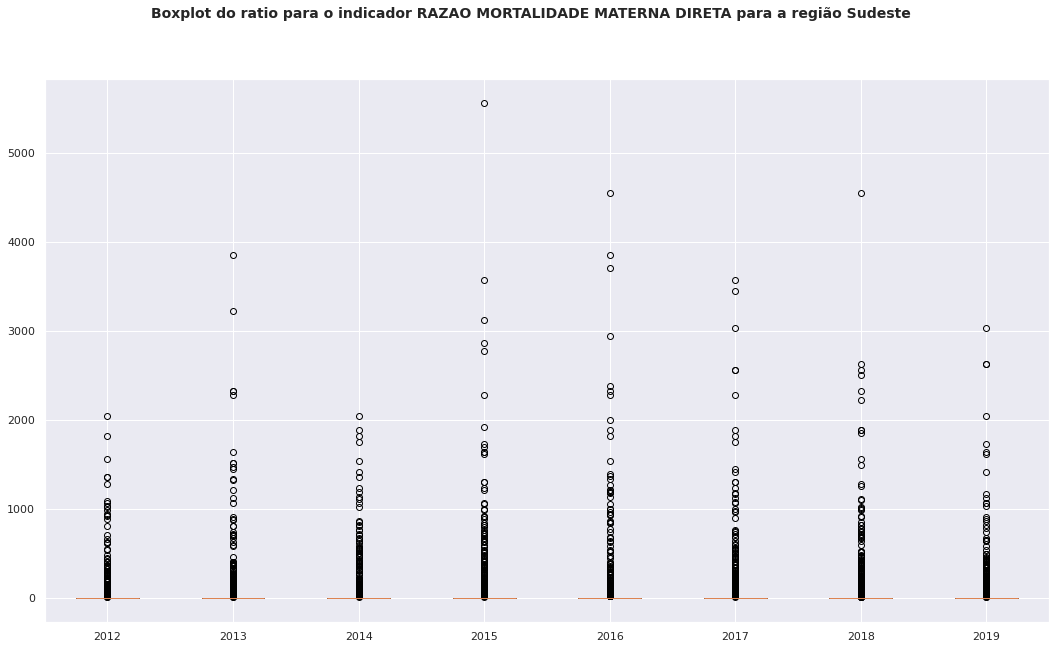

In [85]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [86]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES   Ano  Qtd_Morte_Materna_Direta  Qtd_Total       Ratio
25400    330010  2012                         3       2698  111.193477
25401    330010  2013                         2       2653   75.386355
25402    330010  2014                         1       2838   35.236082
25403    330010  2015                         0       2872    0.000000
25404    330010  2016                         0       2628    0.000000
...         ...   ...                       ...        ...         ...
26131    330630  2015                         1       3439   29.078220
26132    330630  2016                         1       3364   29.726516
26133    330630  2017                         0       3272    0.000000
26134    330630  2018                         0       3376    0.000000
26135    330630  2019                         2       3096   64.599483

[736 rows x 5 columns]


In [87]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

    Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
0  2012                      1038    2905676  35.72
1  2013                      1147    2903867  39.50
2  2014                      1141    2979133  38.30
3  2015                      1155    3017563  38.28
4  2016                      1122    2857704  39.26
5  2017                      1168    2923441  39.95
6  2018                      1112    2944826  37.76
7  2019                      1034    2849064  36.29


No handles with labels found to put in legend.


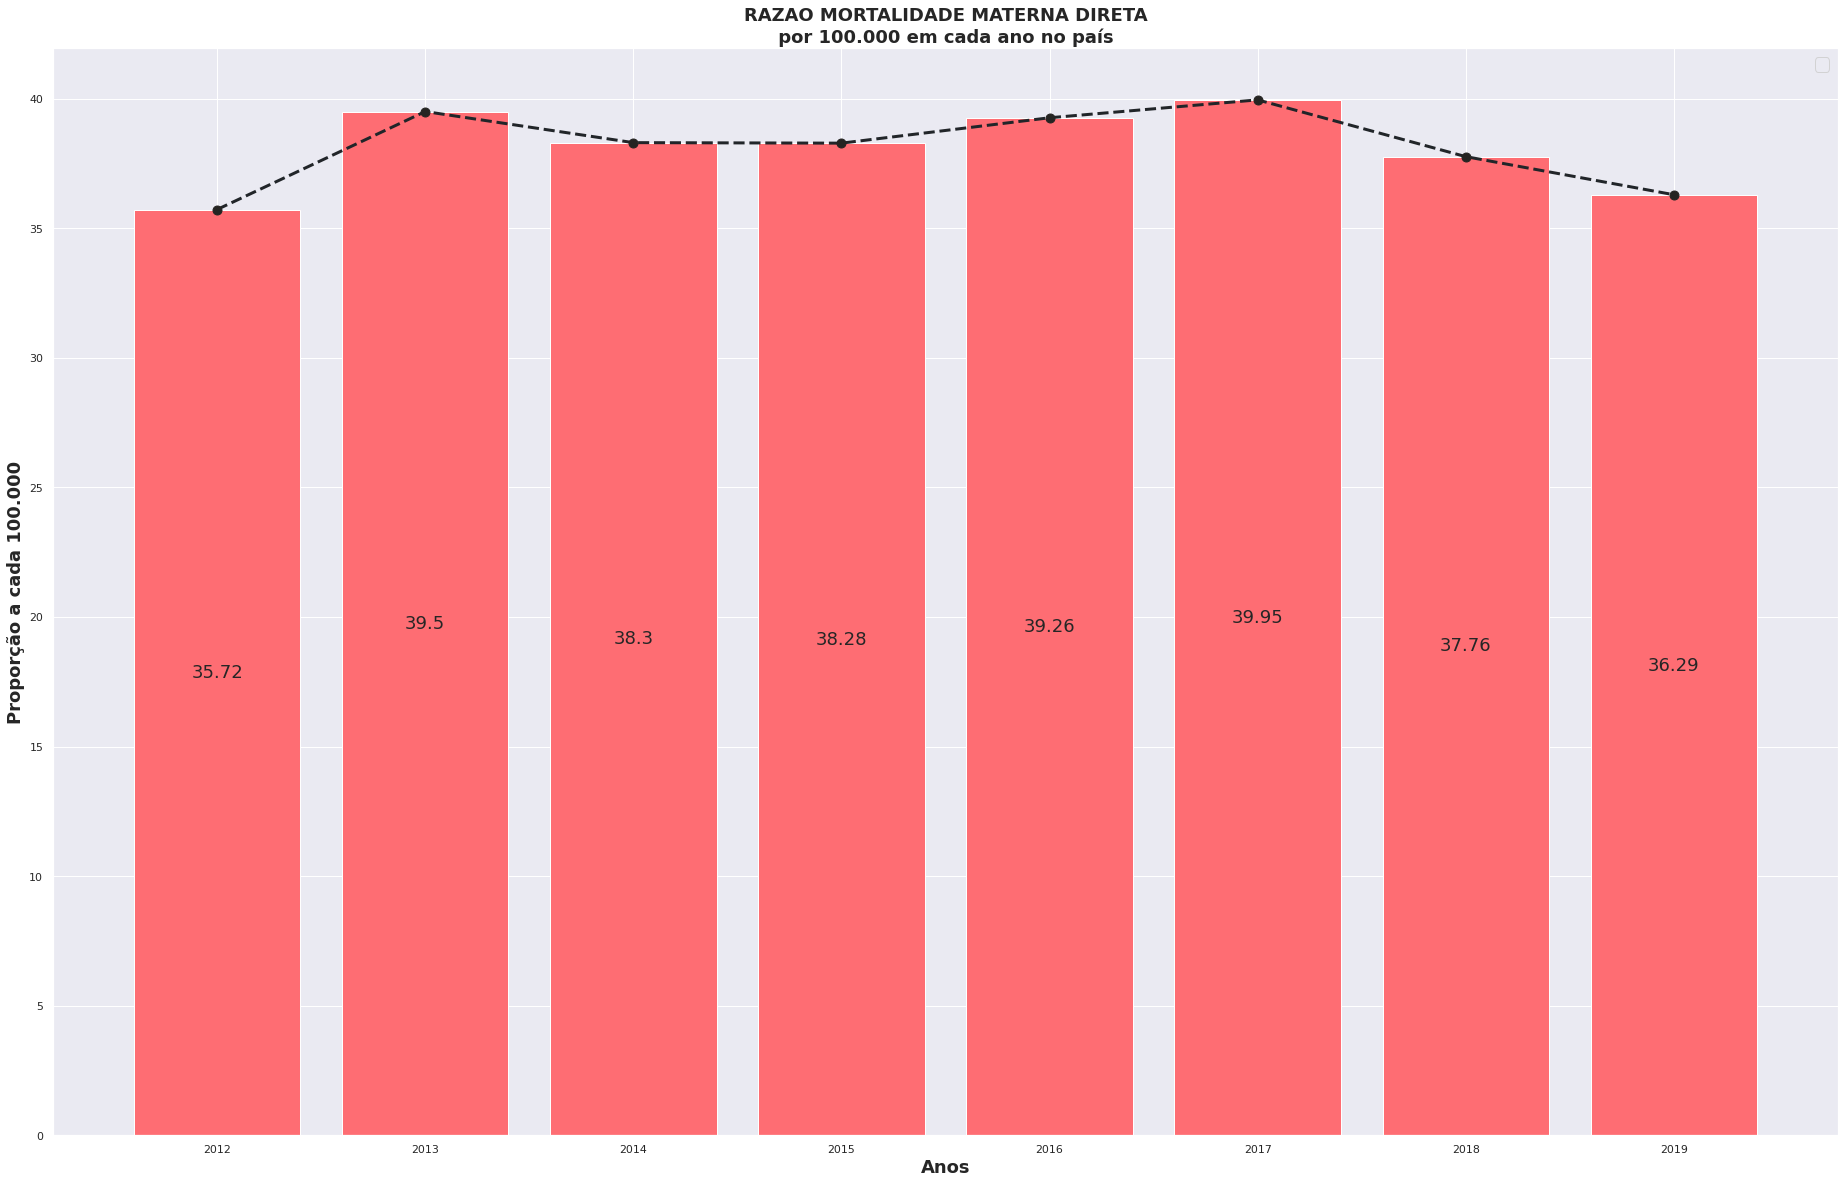

In [88]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

#p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(df_brasil_acumulado[ratio], decimals=2), color ='#fe6d73' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_n = { 'family' : 'DejaVu Sans',
            'size'   : 18}

plt.title(nome_indicador + "\n por 100.000 em cada ano no país ", **font)

plt.ylabel('Proporção a cada 100.000',**font)

plt.xlabel('Anos',**font)
ax.bar_label(p2,label_type="center", fontsize = 18 )
ax.legend(loc='upper right', fontsize = 18 )
#plt.savefig('../Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [89]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
0        11  2012                        13      26511  49.04
1        11  2013                        12      27081  44.31
2        11  2014                        17      27556  61.69
3        11  2015                         9      27914  32.24
4        11  2016                        12      26600  45.11
..      ...   ...                       ...        ...    ...
211      53  2015                        10      46122  21.68
212      53  2016                        17      43340  39.22
213      53  2017                        14      44568  31.41
214      53  2018                        19      44195  42.99
215      53  2019                         3      42422   7.07

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

No handles with labels found to put in legend.


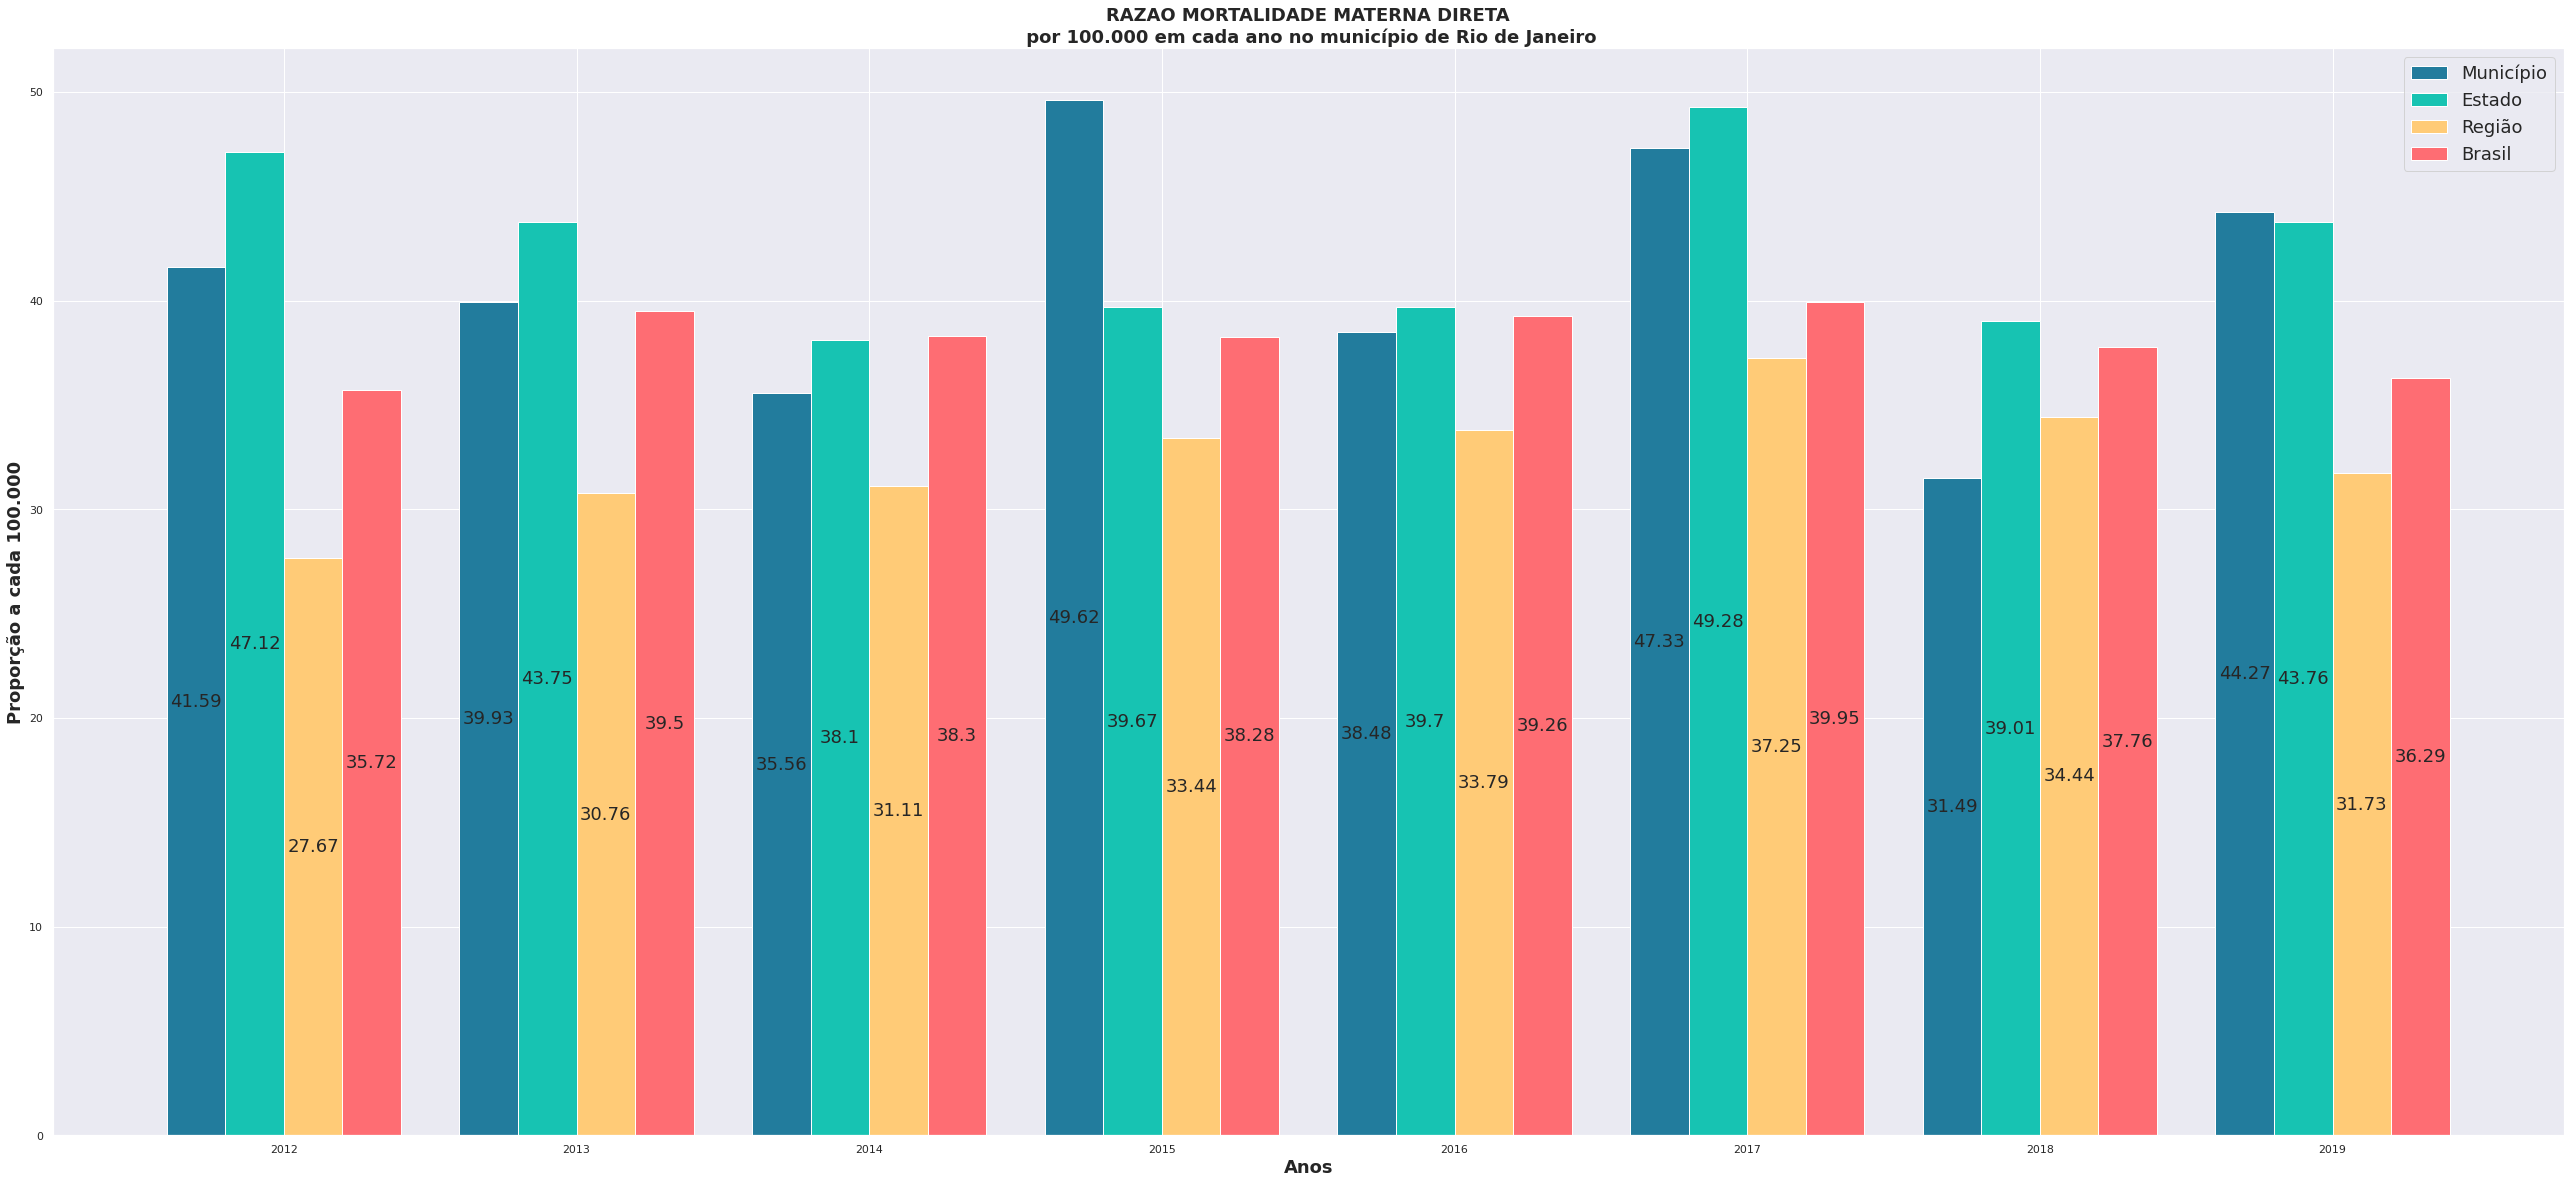

In [90]:
fig, ax = plt.subplots(figsize=(45, 20))

'''
plt.plot(subset_mun[ano], np.round(subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil
'''

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano]-0.3,  np.round(subset_mun[ratio], decimals=2), color ='#227c9d', label = 'Município',width=0.2 )
p2 = ax.bar(subset_mun[ano]-0.1,  np.round(df_estado_acumulado[ratio], decimals=2), color ='#17c3b2', label = 'Estado',width=0.2 )
p3 = ax.bar(subset_mun[ano]+0.1,  np.round(regiao_acumulada[ratio], decimals=2), color ='#ffcb77', label = 'Região',width=0.2 )
p4 = ax.bar(subset_mun[ano]+0.3,  np.round(df_brasil_acumulado[ratio], decimals=2) , color ='#fe6d73', label = 'Brasil',width=0.2)

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_n = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n por 100.000 em cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção a cada 100.000',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center",**font_n)
ax.bar_label(p2,label_type="center",**font_n)
ax.bar_label(p3,label_type="center",**font_n)
ax.bar_label(p4,label_type="center",**font_n)

ax.legend(loc='upper right', fontsize = 18 )

#plt.savefig('../Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

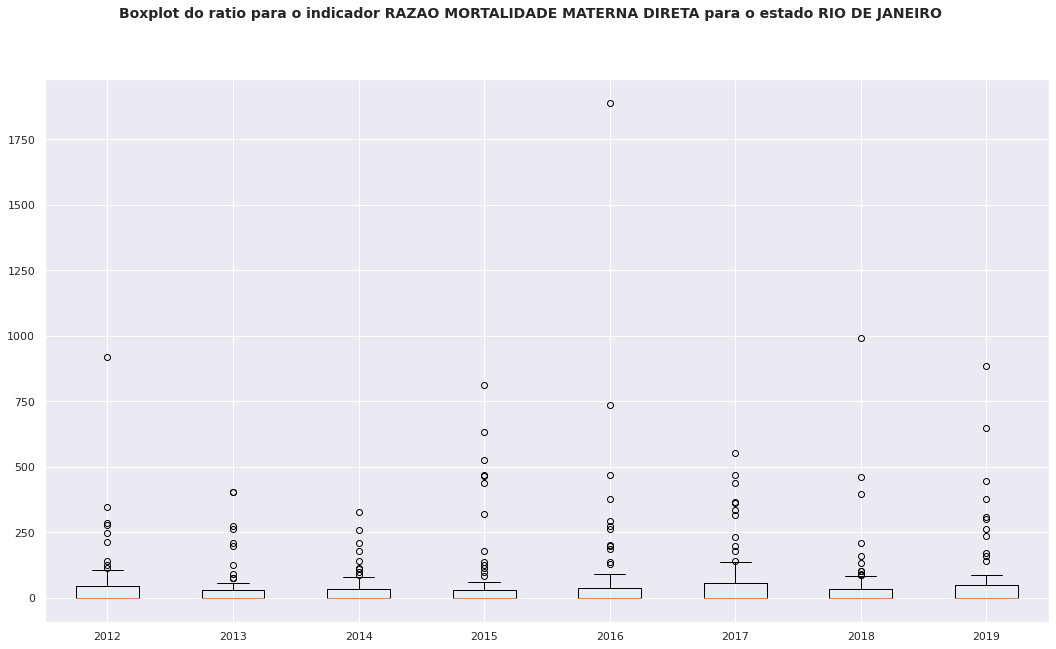

In [91]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [92]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
3,110001,2015,0,373,0.00000
11,110037,2015,0,149,0.00000
19,110040,2015,0,247,0.00000
27,110034,2015,1,200,500.00000
35,110002,2015,1,1783,56.08525


In [93]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
3,11,2015,9,27914,32.24
11,12,2015,10,16980,58.89
19,13,2015,32,80079,39.96
27,14,2015,8,11409,70.12
35,15,2015,68,143655,47.34
43,16,2015,12,15747,76.20
51,17,2015,14,25106,55.76
59,21,2015,88,117556,74.86
67,22,2015,30,49252,60.91
75,23,2015,46,132515,34.71


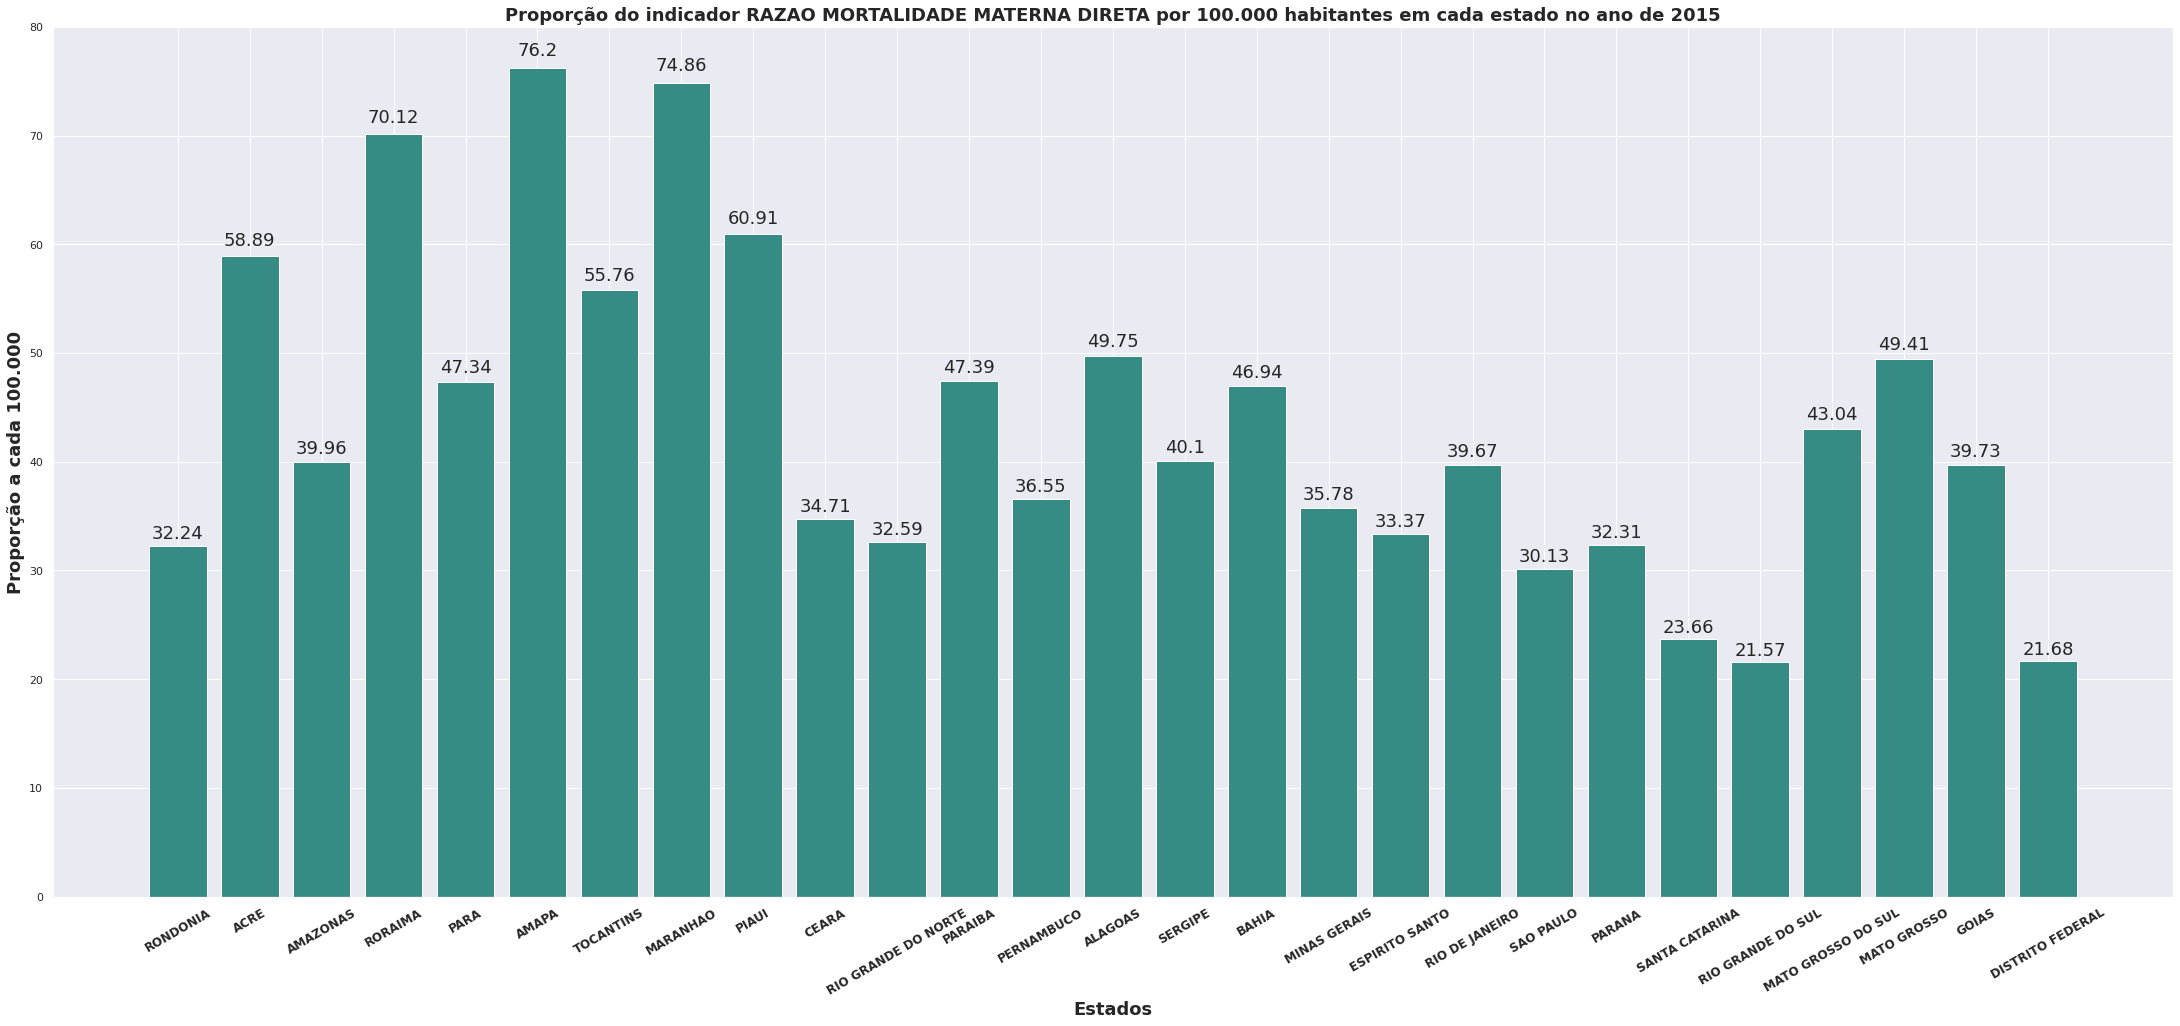

In [94]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Proporção do indicador " + nome_indicador +" por 100.000 habitantes em cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Proporção a cada 100.000',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom',fontsize=18)

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

#plt.savefig('../Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

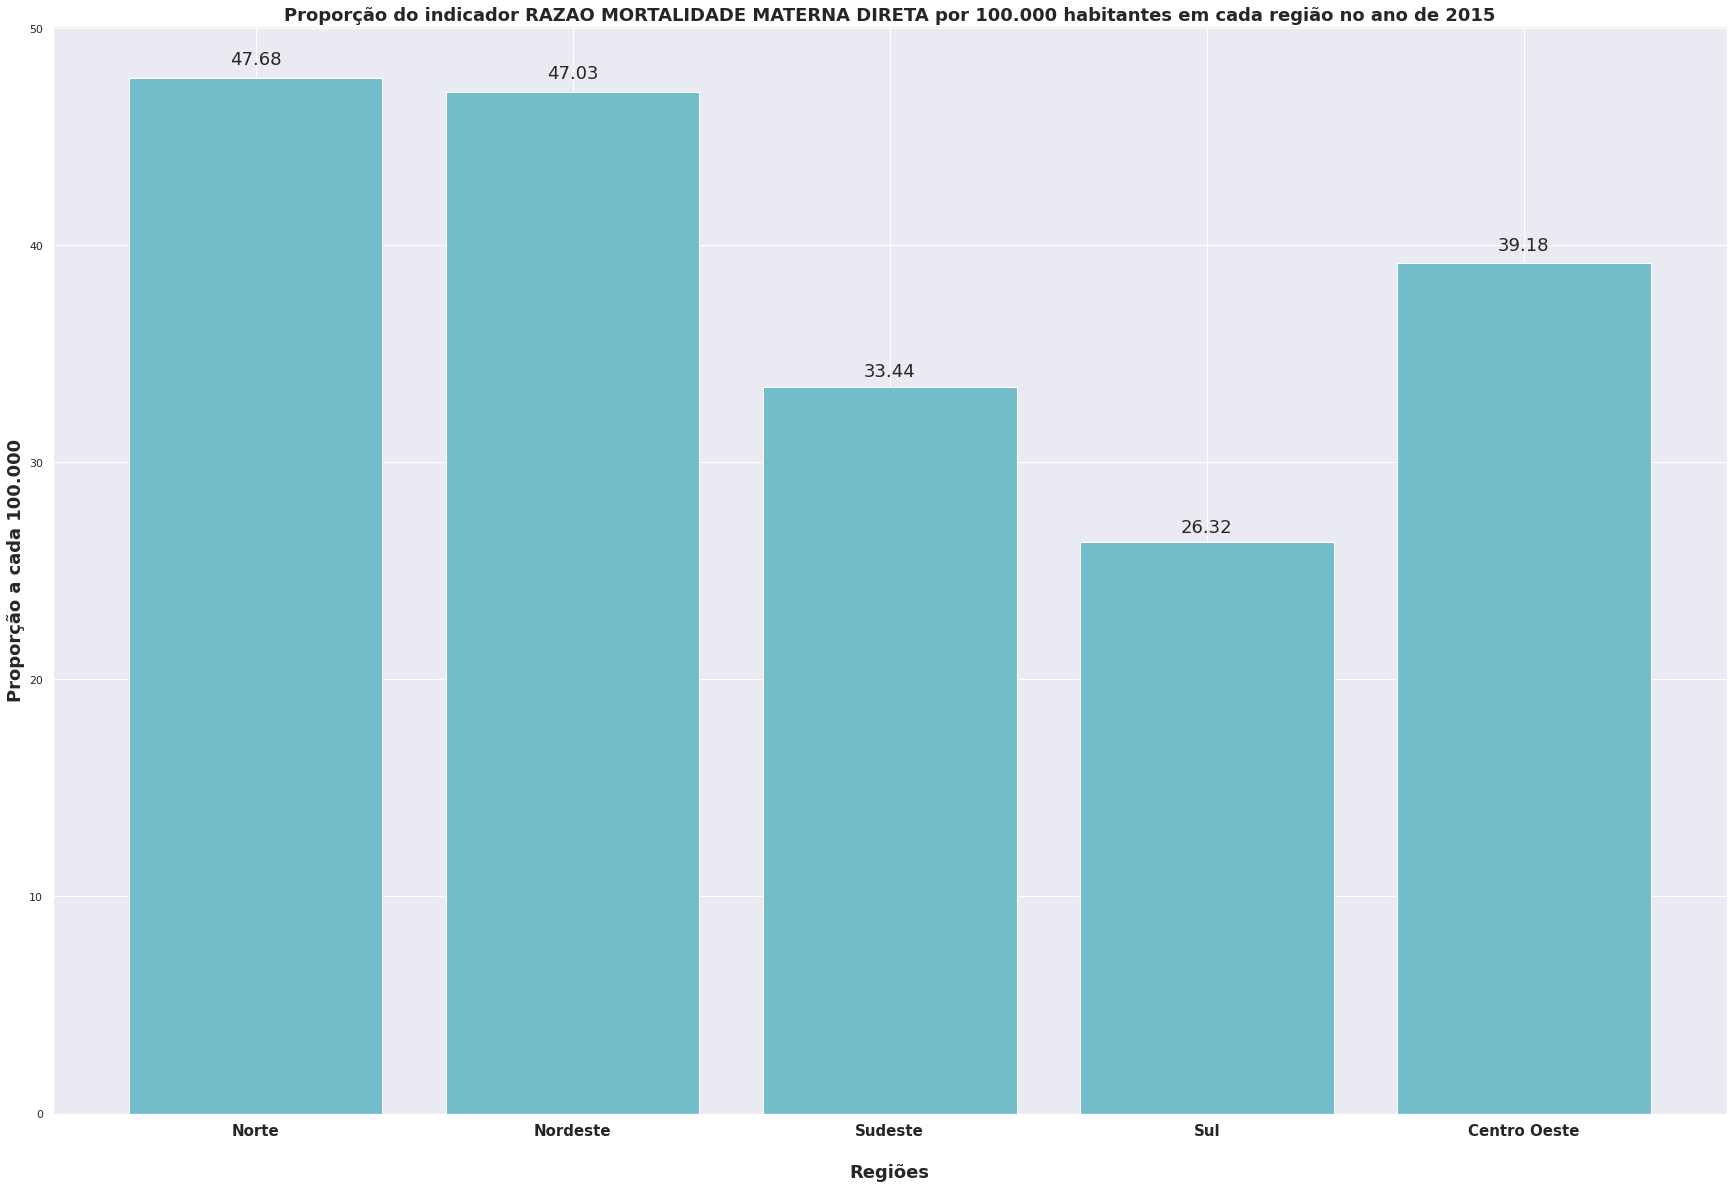

In [95]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Proporção do indicador " + nome_indicador +" por 100.000 habitantes em cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Proporção a cada 100.000',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom',fontsize=18)

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

#plt.savefig('../Imagens/10-grafico7', bbox_inches='tight')
plt.show()

# Refazer as médias

In [90]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2013 ), no Brasil:  107550.62962962964
Mediana do total de registros feitos nesse ano ( 2013 ), entre os estados do Brasil:  56854.0
Quartis do total de registros feitos nesse ano ( 2013 ), entre os estados do Brasil:
 0.25    15.0
0.50    28.0
0.75    62.0
Name: Qtd_Morte_Materna_Direta, dtype: float64

Media estadual do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA  feito nesse ano ( 2013 ) no Brasil:  42.2962962962963
Mediana do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA  feito nesse ano ( 2013 ) entre os estados do Brasil:  28.0
Quartis do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA  feito nesse ano ( 2013 ) entre os estados do Brasil:
 0.25    15.0
0.50    28.0
0.75    62.0
Name: Qtd_Morte_Materna_Direta, dtype: float64

Dataframe agrupado por estado no ano de  2013 

     COD_UF   Ano  Qtd_Morte_Materna_Direta  Qtd_Total  Ratio
1   

In [91]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [92]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2013 ) no estado RIO DE JANEIRO :  2434.8695652173915
Media municipal do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA  feito nesse ano ( 2013 ) no estado RIO DE JANEIRO :  12.41304347826087


In [96]:
df_brasil_acumulado['NOME'] = ['Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil']
df_brasil_acumulado= df_brasil_acumulado.iloc[:, [4, 0, 1, 2, 3]]
del df_brasil_acumulado['Qtd_Morte_Materna_Direta']
del df_brasil_acumulado['Qtd_Total']

df_brasil_por_estado = pd.merge(df_brasil_por_estado, df_estados ,on=["COD_UF"]).rename(columns = {'res_NOME_UF': 'NOME'})
del df_brasil_por_estado['COD_UF']
df_brasil_por_estado=df_brasil_por_estado.iloc[:, [4, 0, 1, 2, 3]]
del df_brasil_por_estado['Qtd_Morte_Materna_Direta']
del df_brasil_por_estado['Qtd_Total']

df_brasil_regiao= df_brasil_regiao.rename(columns = {'NOMEREGIAO': 'NOME'})
del df_brasil_regiao['Qtd_Morte_Materna_Direta']
del df_brasil_regiao['Qtd_Total']

df_planiulha = df_brasil_acumulado.append(df_brasil_por_estado).append(df_brasil_regiao)
df_planiulha.head(5)
df_planiulha.to_csv('../csv_files/rmm/QW-21C_acumulada.csv',index=False)

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [94]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,42.017130
std,11.035267
min,21.326250
25%,35.714375
50%,42.548750
75%,43.919375
max,67.671250


In [95]:
df_to_describe

,Ratio
COD_UF,
11,43.12625
12,42.99000
13,49.17625
14,50.14500
15,59.54250
16,59.18875
17,42.68375
21,67.67125
22,60.32750


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [96]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,44.323990
std,78.468139
min,0.000000
25%,0.000000
50%,0.000000
75%,61.881188
max,1014.610390


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [97]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

            Ratio
count   92.000000
mean    45.492692
std     53.698480
min      0.000000
25%      0.000000
50%     34.689885
75%     61.479828
max    336.007862
0.0


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [98]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,42.000260
330015,0.000000
330020,22.350780
330022,150.229605
330023,19.936204
...,...
330600,108.871805
330610,73.920983
330615,0.000000


In [99]:
df_estado_municipios

,CODMUNRES,Ano,Qtd_Morte_Materna_Direta,Qtd_Total,Ratio
25400,330010,2012,3,2698,111.193477
25401,330010,2013,2,2653,75.386355
25402,330010,2014,1,2838,35.236082
25403,330010,2015,0,2872,0.000000
25404,330010,2016,0,2628,0.000000
...,...,...,...,...,...
26131,330630,2015,1,3439,29.078220
26132,330630,2016,1,3364,29.726516
26133,330630,2017,0,3272,0.000000
26134,330630,2018,0,3376,0.000000


In [100]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23